In [ ]:
# importing Data from mydrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visualizatio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# specially for local system to avoid Warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the Loan Payment dataset to a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Loan-Payments-Data.csv') 

In [ ]:
# Staring 5 data
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


## Data Understanding & Cleaning

In [ ]:
# Collecting some infromation for features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
# Checking null values
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
# Finding relationship between null features and 'loan_status' feature
data['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

### As above we can see repitance of 300 and 100, which means something is realeted to 'loan_status' feature

In [ ]:
# Filtering to specific feature 'loan_status' focuisning on 'PAIDOFF' value
data[(data.loan_status == 'PAIDOFF')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
295,xqd20160296,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 13:00,NaN,30,college,female
296,xqd20160297,PAIDOFF,800,15,9/14/2016,9/28/2016,9/21/2016 4:42,NaN,27,college,male
297,xqd20160298,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,29,High School or Below,male
298,xqd20160299,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,40,High School or Below,male


Here we can oberserve 'PAIDOFF' value has correspond to 'past_due_days' feature all values are null and it's logical; too because if loan is paidoff so there will no sense of this 'past_due_days' feature, so we will fill this feature with null values with 0.

In [ ]:
# Filtering to specific feature 'loan_status' focuisning on 'COLLECTION' value
data[(data.loan_status == 'COLLECTION')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,High School or Below,male
396,xqd20160397,COLLECTION,1000,30,9/12/2016,10/11/2016,NaN,58.0,33,High School or Below,male
397,xqd20160398,COLLECTION,800,15,9/12/2016,9/26/2016,NaN,73.0,39,college,male
398,xqd20160399,COLLECTION,1000,30,9/12/2016,11/10/2016,NaN,28.0,28,college,male


Here we can oberserve 'COLLECTION' value has correspond to 'paid_off_time' feature all values are null and it's logical; too because if loan is is in pending state so there will no sense of this 'paid_off_time' feature, so we will fill this feature with null values with 1, here 1 will reflect loan is in pending state. 

In [ ]:
data['paid_off_time'] = data['paid_off_time'].fillna(1)

In [ ]:
data['past_due_days'] = data['past_due_days'].fillna(0)

In [ ]:
data.isnull().sum().sum()

0

Finally dealed with Null values

In [ ]:
data.shape

(500, 11)

### Now starting with statistical measure

In [ ]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,14.404000,31.116000
std,115.240274,8.000064,25.614312,6.084784
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


In [ ]:
data_loan_status_values = data['loan_status'].value_counts()
pd.DataFrame(data_loan_status_values)

,loan_status
PAIDOFF,300
COLLECTION_PAIDOFF,100
COLLECTION,100


Text(0, 0.5, 'Count')

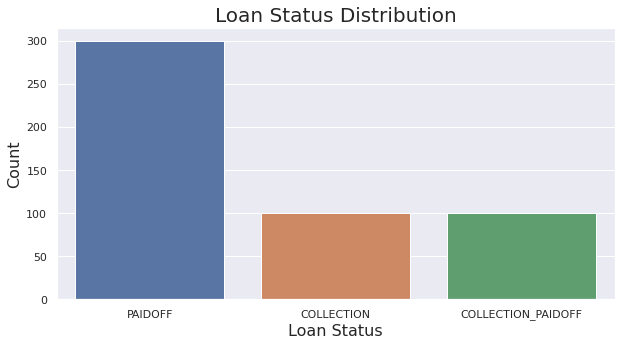

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution',fontsize=20)
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observations:

From above analysis we can say that 60% (300) people repaid the full amount of loan.

20% (100) people did not pay back and rest 20% (100) paid after due date.

# **Each Feature Analysis**

### Principal Analysis

In [ ]:
data_Principal_values = data['Principal'].value_counts()
pd.DataFrame(data_Principal_values)

,Principal
1000,377
800,111
300,6
500,3
900,2
700,1


Text(0, 0.5, 'Count')

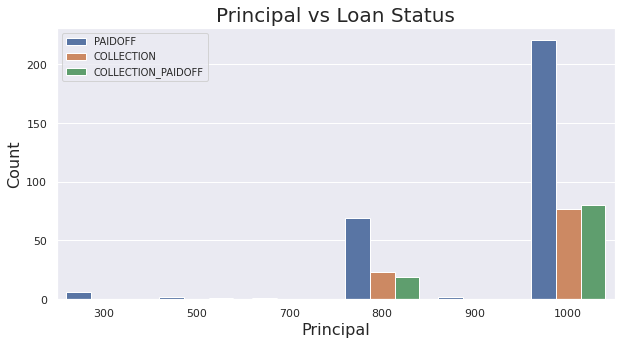

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(data['Principal'], hue=data['loan_status'])
plt.legend(loc='upper left', fontsize=10)
plt.title('Principal vs Loan Status',fontsize=20)
plt.xlabel('Principal', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observation:

Mostly people have opted for Principal of 800 and 1000

### Term Analysis

In [ ]:
data_terms_values = data['terms'].value_counts()
pd.DataFrame(data_terms_values)

,terms
30,272
15,207
7,21


Text(0, 0.5, 'Count')

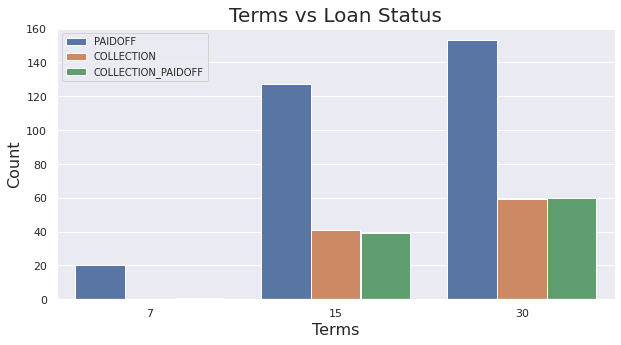

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(data['terms'], hue=data['loan_status'])
plt.legend(loc='upper left', fontsize=10)
plt.title('Terms vs Loan Status',fontsize=20)
plt.xlabel('Terms', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observation:

Some people have opted loan for 7 days term

we can see Hike of the late payments are from people who have their loan terms as 15 days and 30 days

### Loan Effective Date Analysis

In [ ]:
data_effective_date_values = data['effective_date'].value_counts()
pd.DataFrame(data_effective_date_values)

,effective_date
9/11/2016,231
9/12/2016,148
9/10/2016,46
9/14/2016,33
9/13/2016,23
9/9/2016,15
9/8/2016,4


Text(0, 0.5, 'Count')

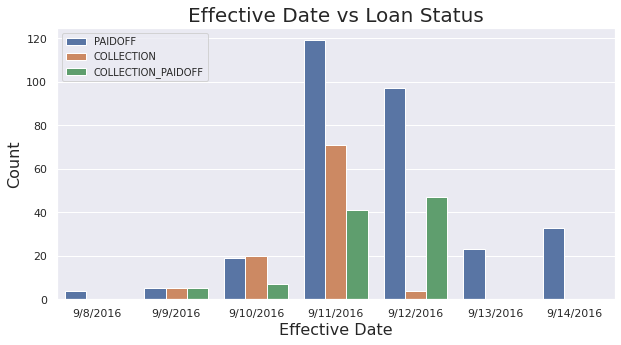

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(data['effective_date'], hue=data['loan_status'])
plt.legend(loc='upper left', fontsize=10)
plt.title('Effective Date vs Loan Status',fontsize=20)
plt.xlabel('Effective Date', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observation:

On 11th and 12th September, loan was given to many people maybe as part of a campaign.

In [ ]:
data_age_values = data['age'].value_counts()
pd.DataFrame(data_age_values)

,age
26,46
29,42
27,38
30,37
28,32
33,30
35,26
34,25
24,23
31,22


Text(0, 0.5, 'Count')

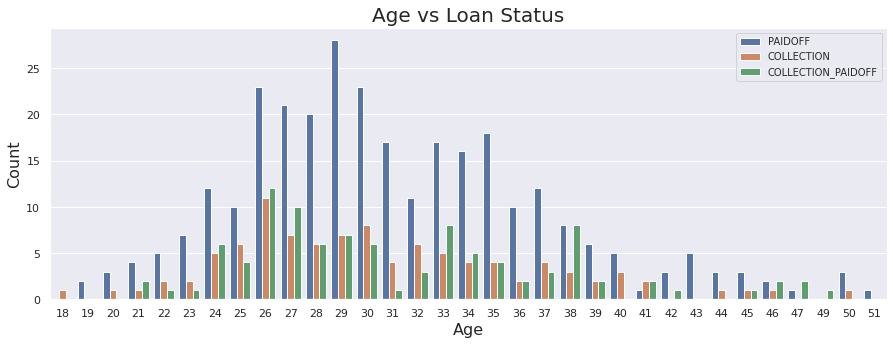

In [ ]:
plt.figure(figsize = [15,5])
sns.countplot(data['age'], hue=data['loan_status'])
plt.legend(loc='upper right', fontsize=10)
plt.title('Age vs Loan Status',fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observation:

Loan is eqaully given to all age groups and we can see highest PAIDOFF rate from age of 26 to 31.

In [ ]:
data_education_values = data['education'].value_counts()
pd.DataFrame(data_education_values)

,education
college,220
High School or Below,209
Bechalor,67
Master or Above,4


In [ ]:
data_grouping_education_loan_status = data.groupby(['education'])['loan_status'].value_counts()
pd.DataFrame(data_grouping_education_loan_status)

loan_status
education            loan_status                    
Bechalor             PAIDOFF                      41
                     COLLECTION_PAIDOFF           15
                     COLLECTION                   11
High School or Below PAIDOFF                     123
                     COLLECTION                   49
                     COLLECTION_PAIDOFF           37
Master or Above      PAIDOFF                       3
                     COLLECTION                    1
college              PAIDOFF                     133
                     COLLECTION_PAIDOFF           48
                     COLLECTION                   39

Text(0, 0.5, 'Count')

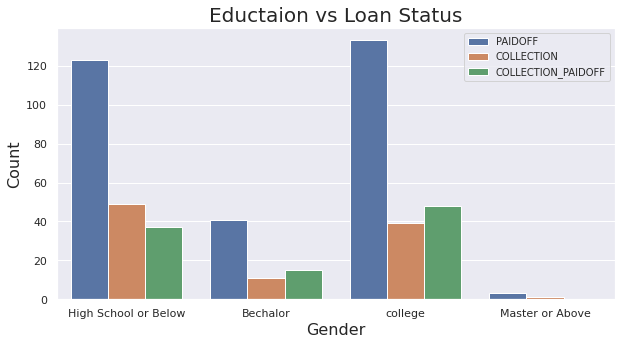

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(data['education'], hue=data['loan_status'])
plt.legend(loc='upper right', fontsize=10)
plt.title('Eductaion vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)

### Observations:

Mainly the loan taker is form College and then from High school. Less people from master or above took loan

In [ ]:
data_Gender_values = data['Gender'].value_counts()
pd.DataFrame(data_Gender_values)

,Gender
male,423
female,77


Text(0, 0.5, 'Gender')

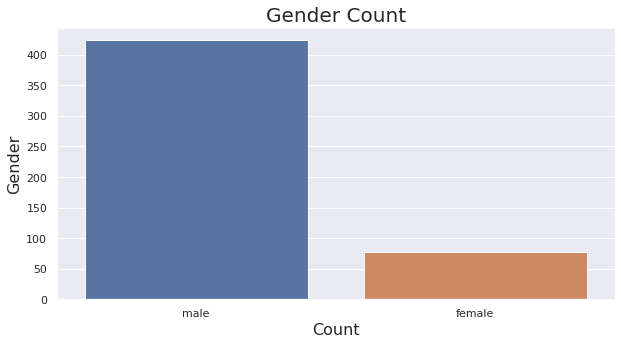

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(x='Gender', data=data)
plt.title('Gender Count',fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Gender', fontsize=16)

### Observations:

Loan given ratio in terms of Male and Female, Male ratio is very higher as comapred to female

In [ ]:
data_grouping_Gender_loan_status = data.groupby(['Gender'])['loan_status'].value_counts()
pd.DataFrame(data_grouping_Gender_loan_status)

loan_status
Gender loan_status                    
female PAIDOFF                      53
       COLLECTION_PAIDOFF           14
       COLLECTION                   10
male   PAIDOFF                     247
       COLLECTION                   90
       COLLECTION_PAIDOFF           86

Text(0, 0.5, 'Count')

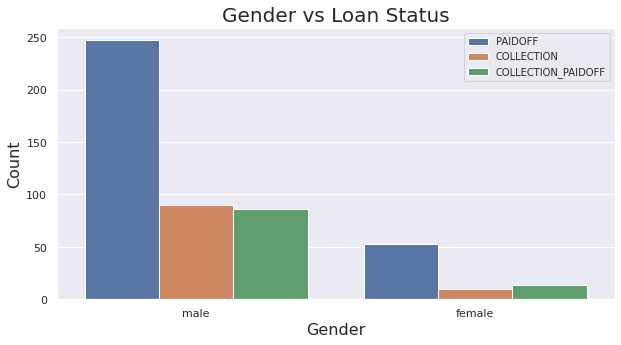

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(data['Gender'], hue=data['loan_status'])
plt.legend(loc='upper right', fontsize=10)
plt.title('Gender vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)

## Observations:

Almost 60% of the male population have repaid their loan and almost 40% paid lately or not yet. Amlost 70% of the female population have repaid their loan and almost 30% paid lately or not yet

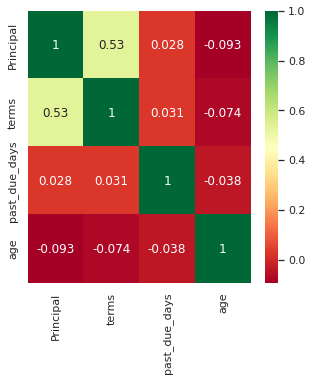

In [ ]:
data_correlation = data.corr()
data_corr_features = data_correlation.index
plt.figure(figsize=(5,5))
#plot heat map
sns.heatmap(data[data_corr_features].corr(),annot=True,cmap="RdYlGn")

## Conclusion:

* 60% (300) people repaid the full amount of loan.

* 20% (100) people did not pay back and rest 20% (100) paid after due date.

* Many people who took loan have age ranging from 24 years to 40 years.

* Almost 60% of the male population have repaid their loan and almost 40% paid lately or not yet.

* Amlost 70% of the fmale population have repaid their loan and almost 30% paid lately or not yet.

* Mainly loan taker is form College and then from High school.

* Less people are from master or above took loan.

* Many people have opted for Principal of 800 and 1000.

* Very less people have opted loan for 7 days term.

* many people do late payments are from who have their loan terms as 15 days and 30 days.

* On 11th and 12th September, loan was given to many people maybe as part of a campaign.